PART 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from statistics import mean

In [2]:
df = pd.DataFrame({
    'x':[1,1,5,4,4,8,8,2],
    'y':[5,2,8,8,9,3,2,1]
})
rowCount = df.shape[0]
df

,x,y
0,1,5
1,1,2
2,5,8
3,4,8
4,4,9
5,8,3
6,8,2
7,2,1


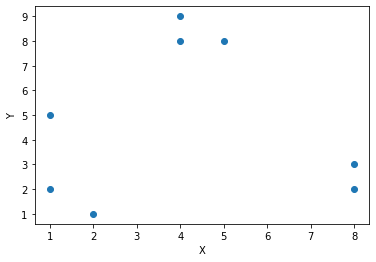

In [3]:
plt.scatter(df.x,df.y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
#declare initial centroid
ic = []
ic.append((1,10))
ic.append((5,8))
ic.append((9,2))
#declare centroids
m1 = []
m2 = []
m3 = []
#declare cluster
clusters = []

In [5]:
def clearList():
  #reset the list empty to make it reusable
  m1.clear()
  m2.clear()
  m3.clear()
  clusters.clear()

def calculateDistance(df,c):
  #find first centroid
  i=0
  while i<rowCount: #iterate through each row
   #get coordinates 
   x1 = df.x[i]
   y1 = df.y[i]
   x2 = c[0][0]
   y2 = c[0][1]
   x3 = c[1][0]
   y3 = c[1][1]
   x4 = c[2][0]
   y4 = c[2][1]
   #Calculate manhattan distance
   p1 = (abs(x2-x1)+abs(y2-y1))
   p2 = (abs(x3-x1)+abs(y3-y1))
   p3 = (abs(x4-x1)+abs(y4-y1))
   #round for two decimal points
   round(p1,2)
   round(p2,2)
   round(p3,2)
   p = [p1,p2,p3]
   clusters.append(findMinDistanceCluster(p)) #compare the distances and select the smallest one
   m1.append(p1)
   m2.append(p2)
   m3.append(p3)
   i+=1
  #create columns based on list
  df['m1'] = m1
  df['m2'] = m2
  df['m3'] = m3
  df['cluster'] = clusters
  return df


def findMinDistanceCluster(p):
  lowestVal = min(p) #get the lowest value
  
  i = 0
  while i<len(p): #iterate through each
    if p[i] == lowestVal:
      return i+1 #assign cluster number of the same distance
    i+=1

def calculateCentroid(df):
  #create variables for x,y and number of data
  x_val1 = 0
  y_val1= 0
  x_val2 = 0
  y_val2= 0
  x_val3 = 0
  y_val3= 0
  num1 = 0
  num2 = 0
  num3 = 0
#find the sum and len of x and y values
  for i in df.index:
   if df.cluster[i] == 1:
    x_val1+= df.x[i]
    y_val1+= df.y[i]
    num1+=1
    
   elif df.cluster[i] == 2:
    x_val2+= df.x[i]
    y_val2+= df.y[i]
    num2+=1
   
   elif df.cluster[i] == 3:
    x_val3+= df.x[i]
    y_val3+= df.y[i]
    num3+=1
#calculate the new cluster centrals
  cx1 = round(x_val1/num1,2)
  cy1 = round(y_val1/num1,2)
  cx2 = round(x_val2/num2,2)
  cy2 = round(y_val2/num2,2)
  cx3 = round(x_val3/num3,2)
  cy3 = round(y_val3/num3,2)

  clearList()

  cl = [] #list for new cluster central
  #add the new cluster centrals to the list
  cl.append((cx1,cy1))
  cl.append((cx2,cy2))
  cl.append((cx3,cy3))

  return cl
  



  


1st Calculation

In [6]:
df1 = calculateDistance(df,ic)

In [7]:
df1

,x,y,m1,m2,m3,cluster
0,1,5,5,7,11,1
1,1,2,8,10,8,1
2,5,8,6,0,10,2
3,4,8,5,1,11,2
4,4,9,4,2,12,2
5,8,3,14,8,2,3
6,8,2,15,9,1,3
7,2,1,10,10,8,3


2nd Calculation

In [8]:
cl = calculateCentroid(df1)
print(cl)

[(1.0, 3.5), (4.33, 8.33), (6.0, 2.0)]


In [9]:
df2 = calculateDistance(df1,cl)
df2

,x,y,m1,m2,m3,cluster
0,1,5,1.5,6.66,8.0,1
1,1,2,1.5,9.66,5.0,1
2,5,8,8.5,1.00,7.0,2
3,4,8,7.5,0.66,8.0,2
4,4,9,8.5,1.00,9.0,2
5,8,3,7.5,9.00,3.0,3
6,8,2,8.5,10.00,2.0,3
7,2,1,3.5,9.66,5.0,1


3rd Calculation

In [10]:
cl = calculateCentroid(df2)
print(cl)

[(1.33, 2.67), (4.33, 8.33), (8.0, 2.5)]


In [11]:
df3 = calculateDistance(df2,cl)
df3

,x,y,m1,m2,m3,cluster
0,1,5,2.66,6.66,9.5,1
1,1,2,1.00,9.66,7.5,1
2,5,8,9.00,1.00,8.5,2
3,4,8,8.00,0.66,9.5,2
4,4,9,9.00,1.00,10.5,2
5,8,3,7.00,9.00,0.5,3
6,8,2,7.34,10.00,0.5,3
7,2,1,2.34,9.66,7.5,1


No change in the cluster assignment, algorithm stops.

Additional plotting

In [12]:
#Declare a list for centroids
fcx = []
fcy = []
#Put final centroids into a list
i=0
while i<len(cl):
  fcx.append(cl[i][0])
  fcy.append(cl[i][1])
  i+=1

#Make dataframe of centroids from centroid list
df_centroids = pd.DataFrame({
    'x':fcx,
    'y':fcy
})


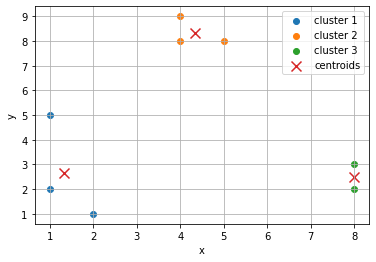

In [13]:
#group the plot data
plot1 = df3[df3['cluster']==1]
plot2 = df3[df3['cluster']==2]
plot3 = df3[df3['cluster']==3]
#plot the data
plt.scatter(plot1.x,plot1.y,label='cluster 1')
plt.scatter(plot2.x,plot2.y,label='cluster 2')
plt.scatter(plot3.x,plot3.y,label='cluster 3')
plt.scatter(df_centroids.x,df_centroids.y,label='centroids',s=100,marker='x')
#label the axis
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
#show the plotting
plt.grid()